# School Result Data Analyzer .

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load Dataset

In [10]:
df = pd.read_csv("/content/drive/MyDrive/school_results_cleaned.csv")

# 2. Data Cleaning



In [11]:
df.drop_duplicates(inplace=True)

subjects = ["Hindi", "English", "Science", "Maths", "History", "Geography"]
df[subjects] = df[subjects].astype(int)

df["Total"] = df[subjects].sum(axis=1)
df["Pass/Fail"] = df["Total"].apply(lambda x: "Pass" if (x/len(subjects)) >= 40 else "Fail")



 # 3. Subject-wise Analysis




In [12]:
subject_avg = df[subjects].mean().round(2)
subject_topper = {sub: df.loc[df[sub].idxmax(), "Student"] for sub in subjects}

print("\n--- Subject Averages ---")
print(subject_avg)

print("\n--- Subject Toppers ---")
for sub, stu in subject_topper.items():
    marks = df.loc[df[sub].idxmax(), sub]
    print(f"{sub} → {stu} ({marks} marks)")


--- Subject Averages ---
Hindi        51.64
English      50.11
Science      49.44
Maths        49.55
History      49.03
Geography    50.03
dtype: float64

--- Subject Toppers ---
Hindi → S246 (99 marks)
English → S252 (99 marks)
Science → S103 (99 marks)
Maths → S3 (99 marks)
History → S196 (99 marks)
Geography → S235 (99 marks)


# 4. Class-wise Toppers

In [17]:
class_toppers = df.groupby("Class").apply(lambda x: x.loc[x["Total"].idxmax()][["Student", "Total"]])

print("\n--- Class-wise Toppers ---")
print(class_toppers)

# 5. Pass/Fail Rate
pass_rate = round((df['Pass/Fail'].value_counts(normalize=True)['Pass']*100),2)
print(f"\nPass Rate: {pass_rate}%")


--- Class-wise Toppers ---
      Student  Total
Class               
9        S533    505
10       S574    467
11       S760    447
12       S613    474

Pass Rate: 80.6%


/tmp/ipython-input-745328902.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_toppers = df.groupby("Class").apply(lambda x: x.loc[x["Total"].idxmax()][["Student", "Total"]])


# 6. Visualizations

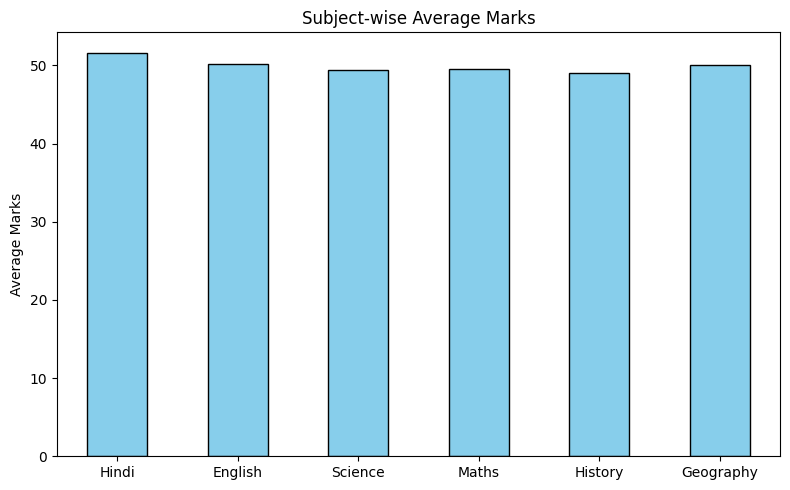

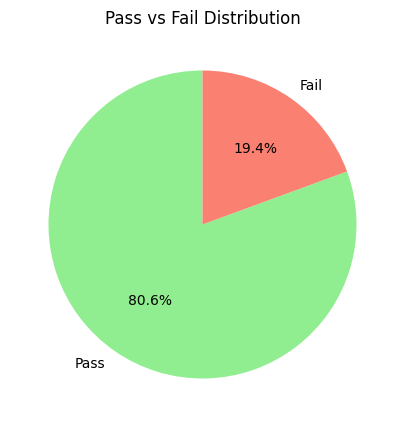

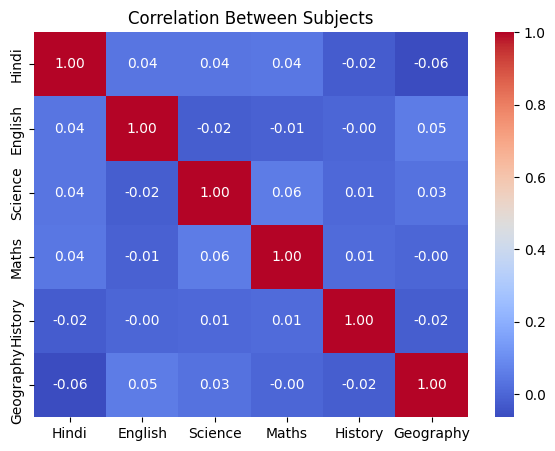

In [15]:
plt.figure(figsize=(8,5))
subject_avg.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Subject-wise Average Marks")
plt.ylabel("Average Marks")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
df["Pass/Fail"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["lightgreen", "salmon"])
plt.title("Pass vs Fail Distribution")
plt.ylabel("")
plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(df[subjects].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Subjects")
plt.show()

# 7. ML Model: Predict Pass/Fail

In [18]:
X = df[subjects]
y = df["Pass/Fail"].map({"Pass":1, "Fail":0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Confusion Matrix:
 [[ 43   1]
 [  1 155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.99      0.99      0.99       156

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



#8. Export Summary Report

In [20]:
report = {
    "Subject Averages": subject_avg.to_dict(),
    "Subject Toppers": subject_topper,
    "Class Toppers": class_toppers.to_dict(),
    "Pass Rate (%)": pass_rate,
    "Model Accuracy": round(acc,2),
    "Model Precision": round(prec,2),
    "Model Recall": round(rec,2),
    "Model F1": round(f1,2)
}

with open("final_report.txt", "w") as f:
    for key, value in report.items():
        f.write(f"{key}: {value}\n")

print("\n Project complete. Summary saved to 'final_report.txt'")


 Project complete. Summary saved to 'final_report.txt'
